# InsighFace research
Made by Kevin Rodriguez

First let's start with something simple, detecting a face using one of the pre-defined models

In [1]:
import cv2 #For video and image capture
import numpy as np # For numerical processing
import insightface
from insightface.app import FaceAnalysis# Api for face detection and recognition
from insightface.data import get_image as ins_get_image# For getting some example images

# Load the model
# https://github.com/deepinsight/insightface/tree/master/python-package
# You can use cuda provider if you have a GPU, otherwise use CPUExecutionProvider
def SimpleInsightFaceTest(image_path=None, model_name="buffalo_s", providers=['CUDAExecutionProvider']):
    app = FaceAnalysis(name=model_name, providers=providers)
    app.prepare(ctx_id=0, det_size=(640, 640))# Prepare the model for face detections, transform each image into a 640x640 image
    img = ins_get_image("t1")# Get an example image called T1
    if (image_path):
        img = cv2.imread(image_path)# Use my own image
    faces = app.get(img)# Get the faces in the image
    rimg = app.draw_on(img, faces)# Draw a box around the face 
    cv2.imwrite("./Images/first_image_output.jpg", rimg)# Save the image
    return faces
faces = SimpleInsightFaceTest()

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\w600k_mbf.onnx recognition ['None', 3, 112, 112] 127

c:\Users\GlobE\OneDrive\Escritorio\IA Pruebas\InsightFace\entorno\Lib\site-packages\insightface\model_zoo\retinaface.py:285: RuntimeWarning: invalid value encountered in divide
  ovr = inter / (areas[i] + areas[order[1:]] - inter)
c:\Users\GlobE\OneDrive\Escritorio\IA Pruebas\InsightFace\entorno\Lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


What is the output from the API of InsightFace?.
- It will give you and array with all the recognized faces following the next atributes:
    - Bounding box where the face was detected
    - Key points (mouth, eyes, nose)
    - Detection score
    - 3D landmark
    - Pose
    - 2D landmark
    - Gender
    - Age
    - Embedding for swapping

In [2]:
print(f"Number of detected faces {len(faces)}")
print(faces[0].keys())
print(faces[0]['det_score'])

Number of detected faces 6
dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])
0.8794565


Now lets see the image including the outputs

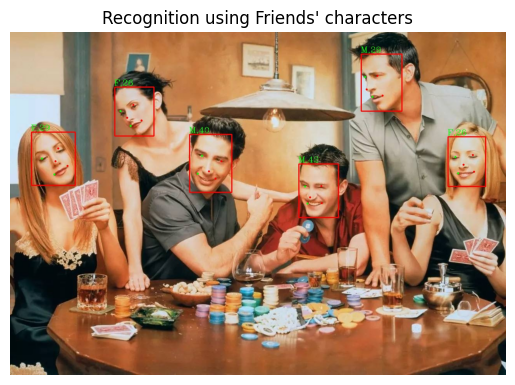

In [2]:
import matplotlib.pyplot as plt# For plotting
import matplotlib.image as mpimg# For reading images with matplotlib

imagen = mpimg.imread("./Images/first_image_output.jpg")# Read the image
plt.imshow(imagen)# Show the image
plt.title("Recognition using Friends' characters")# Add a title
plt.axis('off')# Remove the axis
plt.show()# Show the plot

## Using insightface for live recognition using webcam

In [4]:
def LiveRecognition(model_name="buffalo_s", providers=['CUDAExecutionProvider'], max_frames=10000):
    app = FaceAnalysis(name=model_name, providers=providers)
    app.prepare(ctx_id=0, det_size=(640, 640))
    cap = cv2.VideoCapture(0)# Open the camera and get the video

    if not cap.isOpened():
        print("Error al abrir la cámara.")
        exit()

    n_frame = 0

    while True:
        ret, frame = cap.read()# Read one frame from the video
        
        if not ret:
            print("Error al capturar el frame.")
            break

        n_frame += 1

        # If you want to detect faces in every frame, change the number to 1, otherwise change it to 2, 3, 4, etc.
        if (n_frame % 1) == 0:
            faces = app.get(frame)# Get the faces in the frame
            frame = app.draw_on(frame, faces)# Draw a box around the face

        # Show which frame are you processing
        cv2.putText(frame, f'Frame: {n_frame}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.imshow('Frame de la Cámara', frame)# Show the frame with bbox, age, gender
        # Press q to exit or if you reach 10000 frames
        if cv2.waitKey(1) & 0xFF == ord('q') or n_frame == max_frames:
            break

    # Libera la cámara y cierra todas las ventanas
    cap.release()
    cv2.destroyAllWindows()
LiveRecognition()

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\w600k_mbf.onnx recognition ['None', 3, 112, 112] 127

## Example
<img src="./Images/Example.png" alt="Alt text" width="700"/>

## Swapper Model
One of the things I found reseaching about InsightFace was the onnx model about swapping faces

In [5]:
swapper = insightface.model_zoo.get_model("./Models/inswapper_128.onnx", download=False, download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [4]:
img_face_swap = cv2.imread("./Images/Kevin.jpg")
app = FaceAnalysis(name="buffalo_s", providers=['CUDAExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))
face_swap = app.get(img_face_swap)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\w600k_mbf.onnx recognition ['None', 3, 112, 112] 127

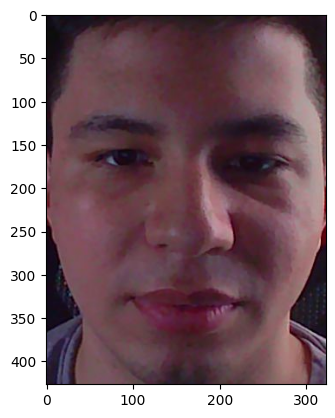

In [18]:
source_face = face_swap[0]
bbox = source_face["bbox"]
bbox = [int(b) for b in bbox]

plt.imshow(img_face_swap[bbox[1]:bbox[3], bbox[0]:bbox[2],::-1])
plt.show()

In [19]:
img = ins_get_image("t1")# Get an example image called T1
res = img.copy()

for face in faces:
    res = swapper.get(res, face, source_face, paste_back=True)

## Plot the Swapped Faces

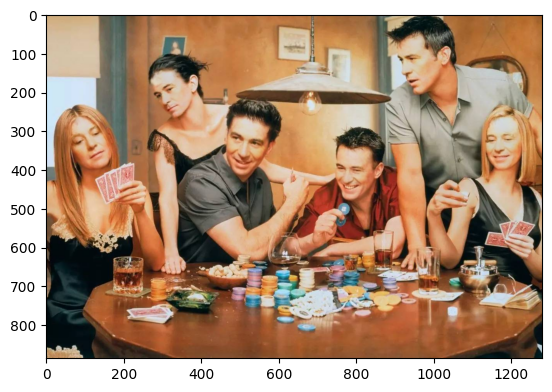

In [22]:
plt.imshow(res[:,:,::-1])
plt.show()

## Final Script

In [25]:
def Swapping(url_img, url_source_face):
    img = cv2.imread(url_img)
    swapper = insightface.model_zoo.get_model("./Models/inswapper_128.onnx", download=False, download_zip=False)
    source_face_img = cv2.imread(url_source_face)
    source_face = app.get(source_face_img)
    print(len(source_face))
    source_face = source_face[0]
    res = img.copy()

    faces = app.get(res)

    for face in faces:
        res = swapper.get(res, face, source_face, paste_back=True)
    plt.imshow(res[:,:,::-1])
    plt.show()

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]
1


c:\Users\GlobE\OneDrive\Escritorio\IA Pruebas\InsightFace\entorno\Lib\site-packages\insightface\model_zoo\retinaface.py:285: RuntimeWarning: invalid value encountered in divide
  ovr = inter / (areas[i] + areas[order[1:]] - inter)
c:\Users\GlobE\OneDrive\Escritorio\IA Pruebas\InsightFace\entorno\Lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


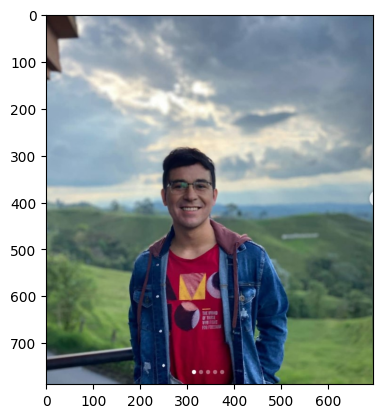

In [26]:
Swapping("./Images/Julian.jpg","./Images/Kevin.jpg")

## Emotion ONNX model

ONNX model for emotion recognition. First of all you have to transform the faces to grayscale in 64x64 scale

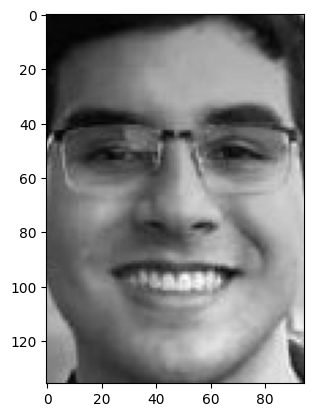

True

In [5]:
img = cv2.imread("./Images/Julian.jpg")# Read the image
face_subject= app.get(img)# Get the faces in the image
source_face = face_subject[0]
bbox = source_face["bbox"]
bbox = [int(b) for b in bbox]

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)# Convert the image to grayscale
plt.imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2]], cmap='gray')
plt.show()

cv2.imwrite("./Images/64b64Subject.jpg", img[bbox[1]:bbox[3], bbox[0]:bbox[2]])

In [6]:
import PIL

def preprocess(image_path):
    input_shape = (1, 1, 64, 64)
    img = PIL.Image.open(image_path)
    img = img.resize((64, 64), PIL.Image.LANCZOS)
    img_data = np.array(img)
    img_data = np.resize(img_data, input_shape)
    return img_data

img_data = preprocess("./Images/64b64Subject.jpg")

In [7]:
import onnxruntime

img_data = img_data.astype(np.float32)# Convert the image to float32
sesion = onnxruntime.InferenceSession("./Models/emotion-ferplus-12-int8.onnx", providers=["CUDAExecutionProvider"])# Load the model
input_name = sesion.get_inputs()[0].name
print(input_name)
results = sesion.run(None, {input_name: img_data})
#emotion_table = {'neutral':0, 'happiness':1, 'surprise':2, 'sadness':3, 'anger':4, 'disgust':5, 'fear':6, 'contempt':7}
print(results)

Input3
[array([[ 1.5025449, 11.031879 ,  0.6456357, -1.6337862, -1.3109449,
        -3.3655133, -3.4749572, -1.5441298]], dtype=float32)]


In [5]:
def Emotion(results):
    emotion = ["Neutral", "Happiness", "Surprise", "Sadness", "Anger", "Disgust", "Fear", "Contempt"]
    results = results[0][0]
    max_value = max(results)
    max_index = np.where(results == max_value)
    return emotion[max_index[0][0]]

Emotion(results)

'Neutral'

In [10]:

def ImagePreprocessing(img):
    img = PIL.Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    input_shape = (1, 1, 64, 64)
    img = img.resize((64, 64), PIL.Image.LANCZOS)
    img_data = np.array(img)
    img_data = np.resize(img_data, input_shape)
    img_data = img_data.astype(np.float32)
    return img_data

def LiveEmotionRecognition(model_name="buffalo_s", providers=['CUDAExecutionProvider'], max_frames=10000):
    app = FaceAnalysis(name=model_name, providers=providers)
    app.prepare(ctx_id=0, det_size=(640, 640))
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error al abrir la cámara.")
        exit()
    n_frame = 0

    while True:
        ret, frame = cap.read()
        
        if not ret:
            print("Error al capturar el frame.")
            break
        
        n_frame += 1
        emotion = 'None'

        if (n_frame % 1) == 0:
            face_subject = app.get(frame)
            if (len(face_subject) > 0):
                source_face = face_subject[0]
                bbox = source_face["bbox"]
                bbox = [int(b) for b in bbox]
                img = frame[bbox[1]:bbox[3], bbox[0]:bbox[2]]
                img_data = ImagePreprocessing(img)
                results = sesion.run(None, {"Input3": img_data})
                emotion = Emotion(results)

        cv2.putText(frame, f'{emotion}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.imshow('Frame de la Cámara', frame)
        if cv2.waitKey(1) & 0xFF == ord('q') or n_frame == max_frames:
            break

    cap.release()
    cv2.destroyAllWindows()

In [11]:
LiveEmotionRecognition(max_frames=1000000)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\GlobE/.insightface\models\buffalo_s\w600k_mbf.onnx recognition ['None', 3, 112, 112] 127

c:\Users\GlobE\OneDrive\Escritorio\IA Pruebas\InsightFace\entorno\Lib\site-packages\insightface\model_zoo\retinaface.py:285: RuntimeWarning: invalid value encountered in divide
  ovr = inter / (areas[i] + areas[order[1:]] - inter)
c:\Users\GlobE\OneDrive\Escritorio\IA Pruebas\InsightFace\entorno\Lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


(227, 172, 3)
<class 'numpy.ndarray'>
(230, 173, 3)
<class 'numpy.ndarray'>
(226, 170, 3)
<class 'numpy.ndarray'>
(238, 171, 3)
<class 'numpy.ndarray'>
(241, 172, 3)
<class 'numpy.ndarray'>
(240, 170, 3)
<class 'numpy.ndarray'>
(242, 168, 3)
<class 'numpy.ndarray'>
(242, 168, 3)
<class 'numpy.ndarray'>
(237, 162, 3)
<class 'numpy.ndarray'>
(237, 162, 3)
<class 'numpy.ndarray'>
(225, 164, 3)
<class 'numpy.ndarray'>
(230, 166, 3)
<class 'numpy.ndarray'>
(222, 165, 3)
<class 'numpy.ndarray'>
(222, 164, 3)
<class 'numpy.ndarray'>
(221, 164, 3)
<class 'numpy.ndarray'>
(214, 161, 3)
<class 'numpy.ndarray'>
(214, 160, 3)
<class 'numpy.ndarray'>
(214, 161, 3)
<class 'numpy.ndarray'>
